In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install iso-639

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import warnings
from iso639 import languages

warnings.filterwarnings('ignore', category = FutureWarning)

In [ ]:
path_scrapper = "/content/drive/MyDrive/ProjetML/Base_BookCrossing/Base_completee/"
file_scrapper = path_scrapper + "bothWebSites_InternetSearch_AllBooks_BookCrossing.csv"
file_scrapper_cleaned = path_scrapper + "bothWebSites_InternetSearch_AllBooks_BookCrossing_cleaned.csv"

# Category and author_genres

In [ ]:
books_scrapped_cleaned = pd.read_csv(file_scrapper_cleaned, sep = '|')

In [ ]:
books_scrapped_cleaned.head(5)

,isbn,isbn_13,OtherID,book_title,book_author,year_of_publication,Publisher,Category,Category_other,book_description,book_language,Image,number_of_pages,author_genres,author_genres_other,books_in_series,awards
0,195153448,"9,78E+12",0.0,Classical Mythology,Mark P. O. Morford,2003-01-01,"Oxford University Press, USA",social sci,NaN,Provides an introduction to classical myths pl...,en,http://books.google.com/books/content?id=YABYK...,808.0,NaN,NaN,NaN,NaN
1,2005018,"9,78E+12",0.0,Clara Callan : A Novel,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada,actress,NaN,"In a small town in Canada, Clara Callan reluct...",en,http://books.google.com/books/content?id=yfx0v...,414.0,NaN,NaN,[],Trillium Book Award
2,60973129,0,IND:30000026059836,Decision in Normandy,Carlo D'Este,1991-01-01,Harper Perennial,1940-1949,NaN,"Here, for the first time in paperback, is an o...",en,http://books.google.com/books/content?id=_LufA...,555.0,histori,NaN,[],NaN
3,374157065,"9,78E+12",0,Flu : The Story of the Great Influenza Pandemi...,Gina Bari Kolata,1999-01-01,Macmillan,medic,NaN,"Describes the great flu epidemic of 1918, an o...",en,http://books.google.com/books/content?id=GkthX...,330.0,health,NaN,[],NaN
4,393045218,"9,78E+12",0.0,The Mummies of Ürümchi,E. J. W. Barber,1999-01-01,W. W. Norton,design,NaN,A look at the incredibly well-preserved ancien...,en,http://books.google.com/books/content?id=5OujQ...,240.0,histori,NaN,[],NaN


##### Join on both columns 

In [ ]:
#indexes are the categories names

stats_cate = books_scrapped_cleaned["Category"].value_counts(sort = True)
cate = stats_cate.index.unique()

stats_aut_genr = books_scrapped_cleaned["author_genres"].value_counts(sort = True)
aut_genr = stats_aut_genr.index.unique()

In [ ]:
stats_cate.head()

fiction          40474
juvenile fict     5933
biographi         3351
mysteri           2896
histori           2000
Name: Category, dtype: int64

In [ ]:
#Join of books_scrapped_cleaned["Category"] 
#& 
#books_scrapped_cleaned["author_genres"] unique categories

complete_tab = stats_cate

for g in aut_genr:
    if g in cate:
        complete_tab[g] = stats_aut_genr[g] + stats_cate[g]
    else:
        complete_tab[g] = stats_aut_genr[g]

In [ ]:
complete_tab.sort_values(ascending = False)

fiction                         46231
mysteri                         12402
literatur                       11902
romanc                           9479
science fict                     8161
                                ...  
lesbianism.                         1
bodybuild                           1
english essay                       1
motivation in educ                  1
stress management for teenag        1
Name: Category, Length: 4587, dtype: int64

In [ ]:
len(complete_tab)

4587

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

Text(0, 0.5, 'log of books nb in each category')

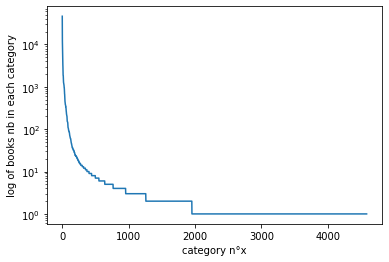

In [ ]:
#Plot of the number of books inside all the 4587 categories
# => the number axis (y) scale is in log

nb_inf = 0
nb_sup = len(complete_tab)

plt.plot(np.arange(nb_inf, nb_sup), complete_tab.sort_values(ascending = False)[nb_inf:nb_sup])

plt.yscale("log")
plt.xlabel("category n°x")
plt.ylabel("log of books nb in each category")

Text(0, 0.5, 'books nb in each category')

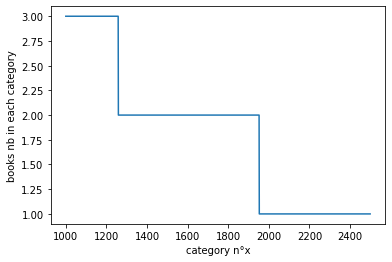

In [ ]:
#Zoom on categories with less than 3 books inside

#Limits for the zoomed view : i-th books' categories (when sorted according to their member number)
nb_inf = 1000 
nb_sup = 2500 

plt.plot(np.arange(nb_inf, nb_sup), complete_tab.sort_values(ascending = False)[nb_inf:nb_sup])

plt.xlabel("category n°x")
plt.ylabel("books nb in each category")

Text(0, 0.5, 'books nb in each category')

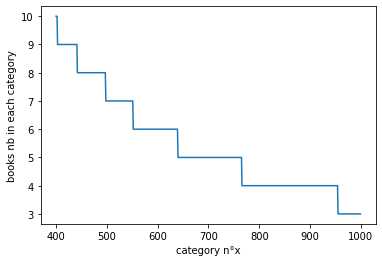

In [ ]:
#Zoom on categories with less than 3 books inside

#Limits for the zoomed view : i-th books' categories (when sorted according to their member number)
nb_inf = 400 
nb_sup = 1000 

plt.plot(np.arange(nb_inf, nb_sup), complete_tab.sort_values(ascending = False)[nb_inf:nb_sup])

plt.xlabel("category n°x")
plt.ylabel("books nb in each category")


##### Keep the most famous categories

In [ ]:
#After the 403-th category (when sorted according to their member number), 
#it remains only at most 10 books inside
#=> Those under-represented categories will be dropped

nb_cat_sel = 403

In [ ]:
complete_tab.sort_values(ascending = False)[0:nb_cat_sel].head()

fiction         46231
mysteri         12402
literatur       11902
romanc           9479
science fict     8161
Name: Category, dtype: int64

In [ ]:
complete_tab.sort_values(ascending = False)[0:nb_cat_sel].to_csv(path_scrapper + "Sel_cat_autgenr.csv", sep = "|")